<a href="https://colab.research.google.com/github/nigarrajabli/data/blob/main/fish_data_analysing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing fish data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import seaborn as sns
sns.set()

In [ ]:
fdata = pd.read_csv('/content/Fish.csv')

Lets have look at first 5 rows to get acquainted with our data at first

In [ ]:
fdata.head()


,Weight,Length_Vertical,Length_Diagonal,Length_Cross,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


So we have the weight of the fish, vertical length, diagonal length, cross length, height and width.


In [ ]:
# Let's check the descriptives
fdata.describe(include='all')

,Weight,Length_Vertical,Length_Diagonal,Length_Cross,Height,Width
count,159.000000,159.000000,138.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,27.460870,31.227044,8.970994,4.417486
std,357.978317,9.996441,11.168676,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,20.550000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,25.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.000000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
#Now lets check whether we have missing values or not
fdata.isnull().sum()

Weight              0
Length_Vertical     0
Length_Diagonal    21
Length_Cross        0
Height              0
Width               0
dtype: int64

In [ ]:
#We have to fill them

fdata['Length_Diagonal'].fillna(value=fdata['Length_Diagonal'].mean(),inplace=True)

In [ ]:
#According to our documentation we leave only the correlatin higher than 70%
fdata.corr()

,Weight,Length_Vertical,Length_Diagonal,Length_Cross,Height,Width
Weight,1.000000,0.915712,0.857257,0.923044,0.724345,0.886507
Length_Vertical,0.915712,1.000000,0.973639,0.992031,0.625378,0.867050
Length_Diagonal,0.857257,0.973639,1.000000,0.947855,0.499377,0.821678
Length_Cross,0.923044,0.992031,0.947855,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.499377,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.821678,0.878520,0.792881,1.000000


In [ ]:
#As we want to build our machine learning model to predict the fish's weight ,we leave all columns cause they have the corr that we need.

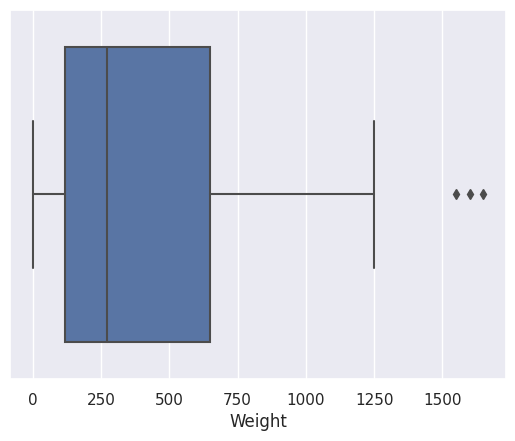

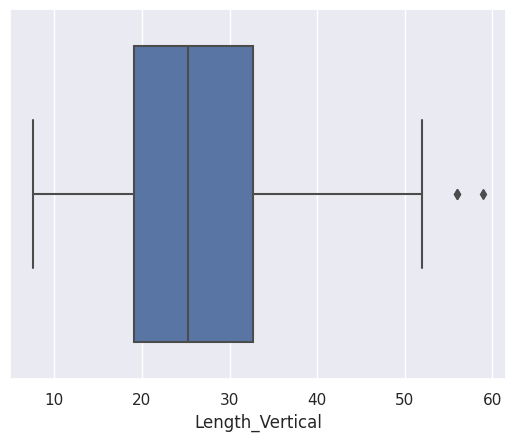

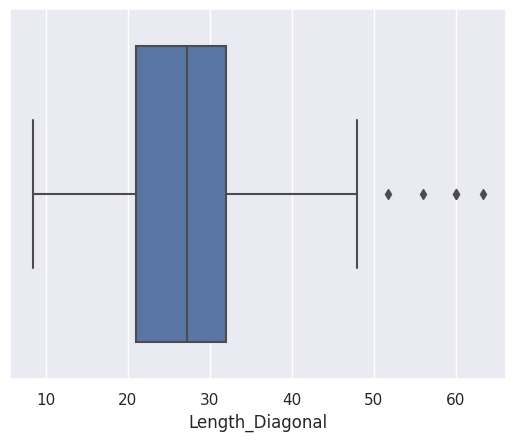

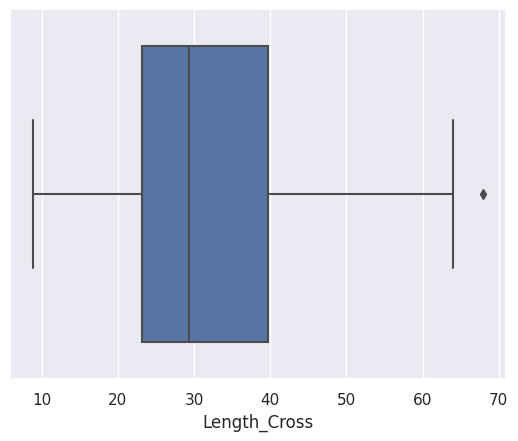

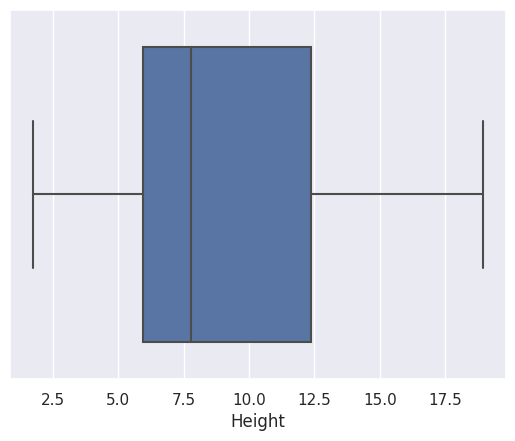

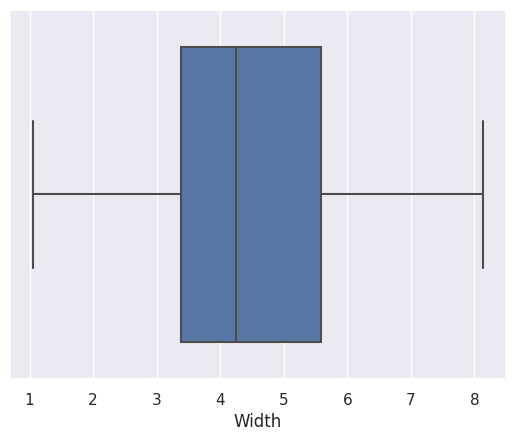

In [ ]:
#Lets detect the outliers in our data by making boxplot

for i in fdata[['Weight','Length_Vertical','Length_Diagonal','Length_Cross','Height','Width']]:
    sns.boxplot(data=fdata, x=fdata[i])
    plt.show()

In [ ]:
#Outlier rule
q1=fdata.quantile(0.25)
q3=fdata.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR


In [ ]:
#capping the outliers

for i in fdata[['Weight','Length_Vertical','Length_Diagonal','Length_Cross','Height','Width']]:
  fdata[i]=np.where(fdata[i]>Upper[i],Upper[i],fdata[i])
  fdata[i]=np.where(fdata[i]<Lower[i],Lower[i],fdata[i])

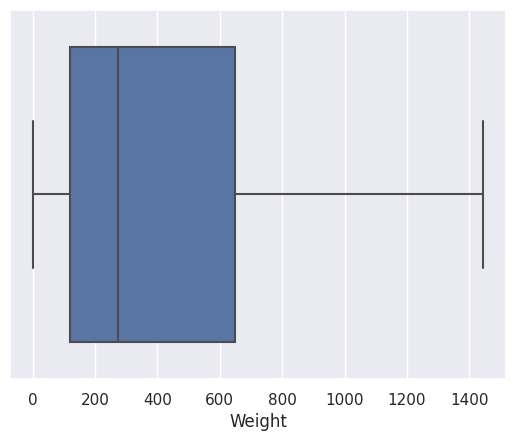

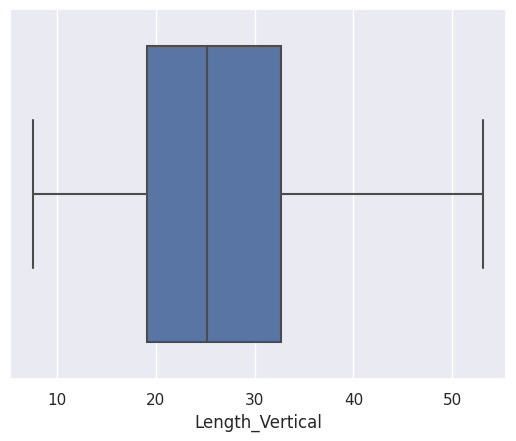

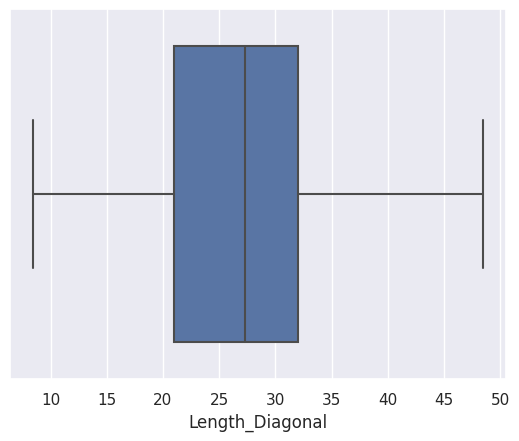

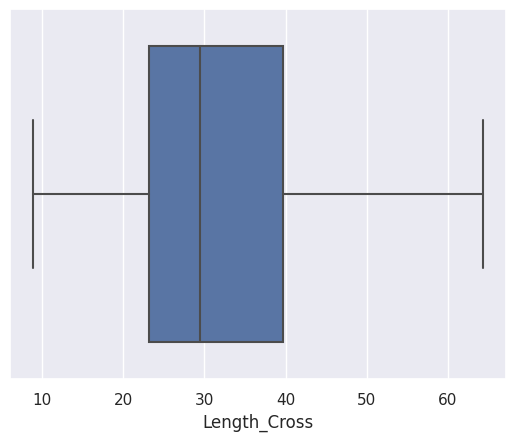

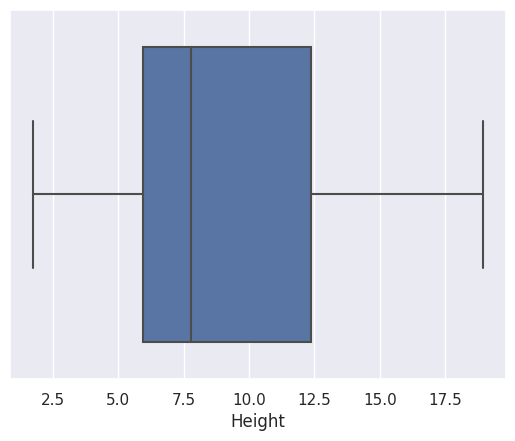

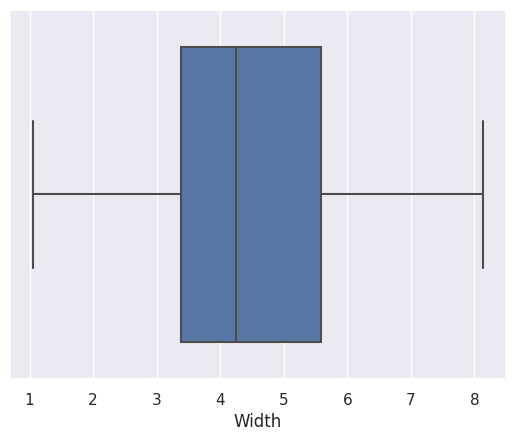

In [ ]:
#Lets check if all of them are capped

for i in fdata[['Weight','Length_Vertical','Length_Diagonal','Length_Cross','Height','Width']]:
    sns.boxplot(data=fdata, x=fdata[i])
    plt.show()

In [ ]:
x=fdata[['Length_Vertical','Length_Diagonal','Length_Cross','Height','Width']]
y=fdata['Weight']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=365)

In [ ]:
# Create a linear regression model
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Obtain the bias (intercept) of the regression
reg.intercept_

-436.36834124904505

In [ ]:
# Obtain the weights (coefficients) of the regression
reg.coef_


array([ 57.98618147, -28.6936156 ,  -8.87981069,   2.79861133,
        78.88028604])

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
import pandas as pd
from sklearn import metrics

# Calculate metrics for the testing set
mae_test = metrics.mean_absolute_error(y_test, y_pred)
mse_test = metrics.mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = metrics.r2_score(y_test, y_pred)

# Calculate metrics for the training set
y_pred_train = reg.predict(X_train)

mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = metrics.r2_score(y_train, y_pred_train)

# Create a DataFrame to store the results
results_dict = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Train': [mae_train, mse_train, rmse_train, r2_train],
    'Test': [mae_test, mse_test, rmse_test, r2_test]
}

results_df = pd.DataFrame(results_dict)

results_df


,Metric,Train,Test
0,MAE,83.666555,77.215087
1,MSE,11349.419829,9056.071572
2,RMSE,106.533656,95.163394
3,R2,0.913118,0.886794


In [ ]:
variables = []
r2_scores = []

# Iterate over each variable in your dataset
for i in X_train.columns:
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]

    # Fit a regression model using the single variable
    reg.fit(X_train_single_var, y_train)
    y_pred_single_var = reg.predict(X_test_single_var)

    # Calculate metrics for the single variable model
    r2 = metrics.r2_score(y_test, y_pred_single_var)

    # Store the results in the lists
    variables.append(i)
    r2_scores.append(r2)

# Create a DataFrame from the results_dict
results_df = pd.DataFrame({'Variable': variables, 'R2': r2_scores})

results_df_sorted = results_df.sort_values(by='R2', ascending=False)

# Print the DataFrame
results_df_sorted


,Variable,R2
4,Width,0.874585
2,Length_Cross,0.765614
0,Length_Vertical,0.715111
3,Height,0.665291
1,Length_Diagonal,0.524612
